In [1]:
%matplotlib notebook

In [2]:
# https://stackoverflow.com/questions/37327308/add-alpha-to-an-existing-matplotlib-colormap
# https://medium.com/@pnpsegonne/animating-a-3d-scatterplot-with-matplotlib-ca4b676d4b55

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

import matplotlib.pylab as pl
from matplotlib.colors import ListedColormap

cmap = pl.cm.binary
my_cmap = cmap(np.arange(cmap.N))
my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
my_cmap = ListedColormap(my_cmap)

<IPython.core.display.Javascript object>


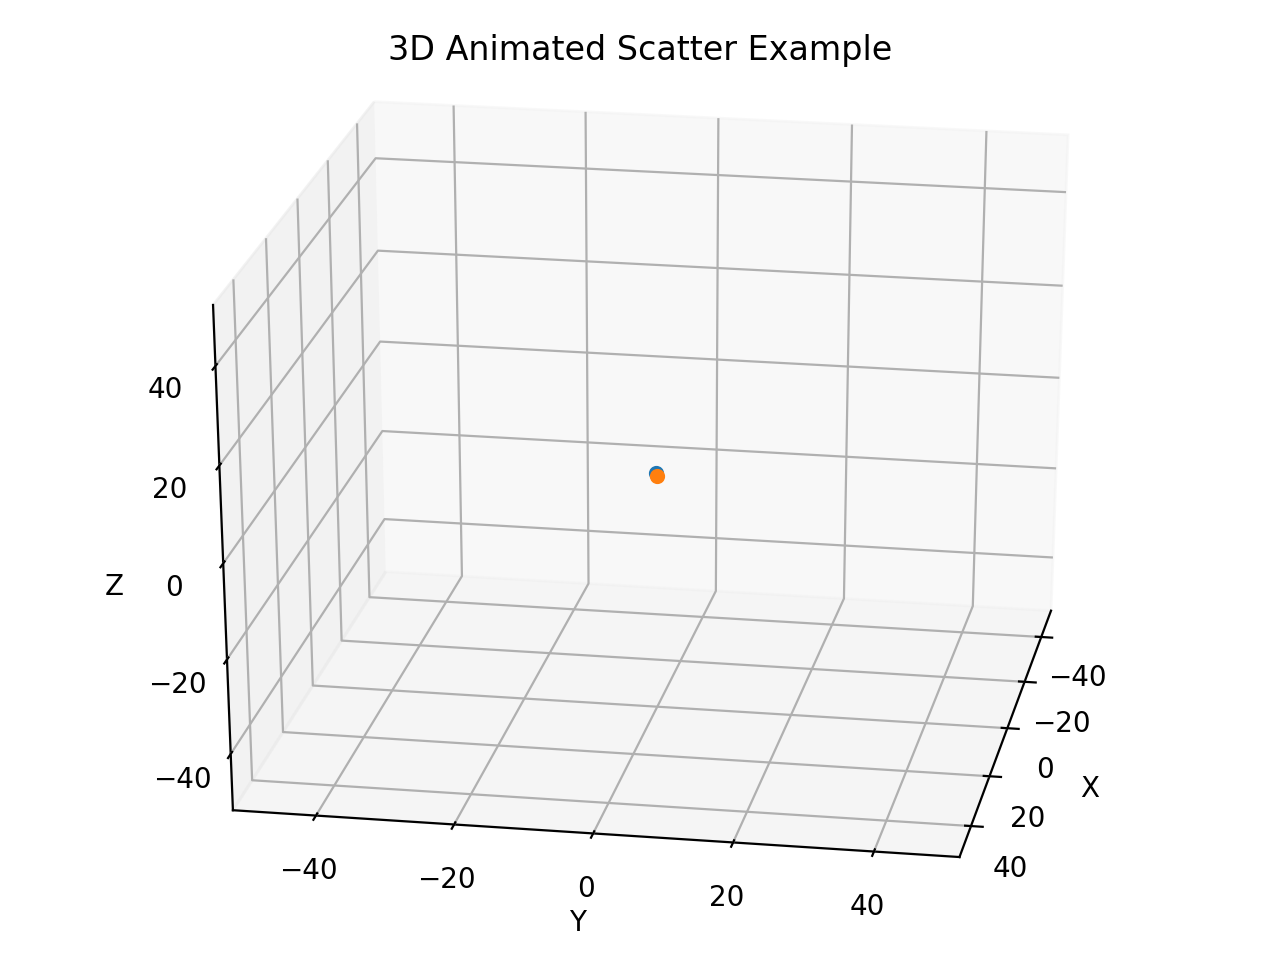

In [4]:
# IMPORTS
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

def generate_data(nbr_iterations, nbr_elements):
    """
    Generates dummy data.
    The elements will be assigned random initial positions and speed.
    Args:
        nbr_iterations (int): Number of iterations data needs to be generated for.
        nbr_elements (int): Number of elements (or points) that will move.
    Returns:
        list: list of positions of elements. (Iterations x (# Elements x Dimensions))
    """
    dims = (3,1)

    # Random initial positions.
    gaussian_mean = np.zeros(dims)
    gaussian_std = np.ones(dims)
    start_positions = np.array(list(map(np.random.normal, gaussian_mean, gaussian_std, [nbr_elements] * dims[0]))).T

    # Random speed
    start_speed = np.array(list(map(np.random.normal, gaussian_mean, gaussian_std, [nbr_elements] * dims[0]))).T

    # Computing trajectory
    data = [start_positions]
    for iteration in range(nbr_iterations):
        previous_positions = data[-1]
        new_positions = previous_positions + start_speed
        data.append(new_positions)

    return data

def animate_scatters(iteration, data, scatters):
    """
    Update the data held by the scatter plot and therefore animates it.
    Args:
        iteration (int): Current iteration of the animation
        data (list): List of the data positions at each iteration.
        scatters (list): List of all the scatters (One per element)
    Returns:
        list: List of scatters (One per element) with new coordinates
    """
    for i in range(data[0].shape[0]):
        scatters[i]._offsets3d = (data[iteration][i,0:1], data[iteration][i,1:2], data[iteration][i,2:])
    return scatters

def main(data, save=False):
    """
    Creates the 3D figure and animates it with the input data.
    Args:
        data (list): List of the data positions at each iteration.
        save (bool): Whether to save the recording of the animation. (Default to False).
    """

    # Attaching 3D axis to the figure
    fig = plt.figure()
    ax = p3.Axes3D(fig)

    # Initialize scatters
    scatters = [ ax.scatter(data[0][i,0:1], data[0][i,1:2], data[0][i,2:]) for i in range(data[0].shape[0]) ]

    # Number of iterations
    iterations = len(data)

    # Setting the axes properties
    ax.set_xlim3d([-50, 50])
    ax.set_xlabel('X')

    ax.set_ylim3d([-50, 50])
    ax.set_ylabel('Y')

    ax.set_zlim3d([-50, 50])
    ax.set_zlabel('Z')

    ax.set_title('3D Animated Scatter Example')

    # Provide starting angle for the view.
    ax.view_init(25, 10)

    ani = animation.FuncAnimation(fig, animate_scatters, iterations, fargs=(data, scatters),
                                       interval=50, blit=False, repeat=True)

#     if save:
#         Writer = animation.writers['ffmpeg']
#         writer = Writer(fps=30, metadata=dict(artist='Me'), bitrate=1800, extra_args=['-vcodec', 'libx264'])
#         ani.save('3d-scatted-animated.mp4', writer=writer)

    plt.show()


data = generate_data(100, 2)
main(data, save=True)

<IPython.core.display.Javascript object>


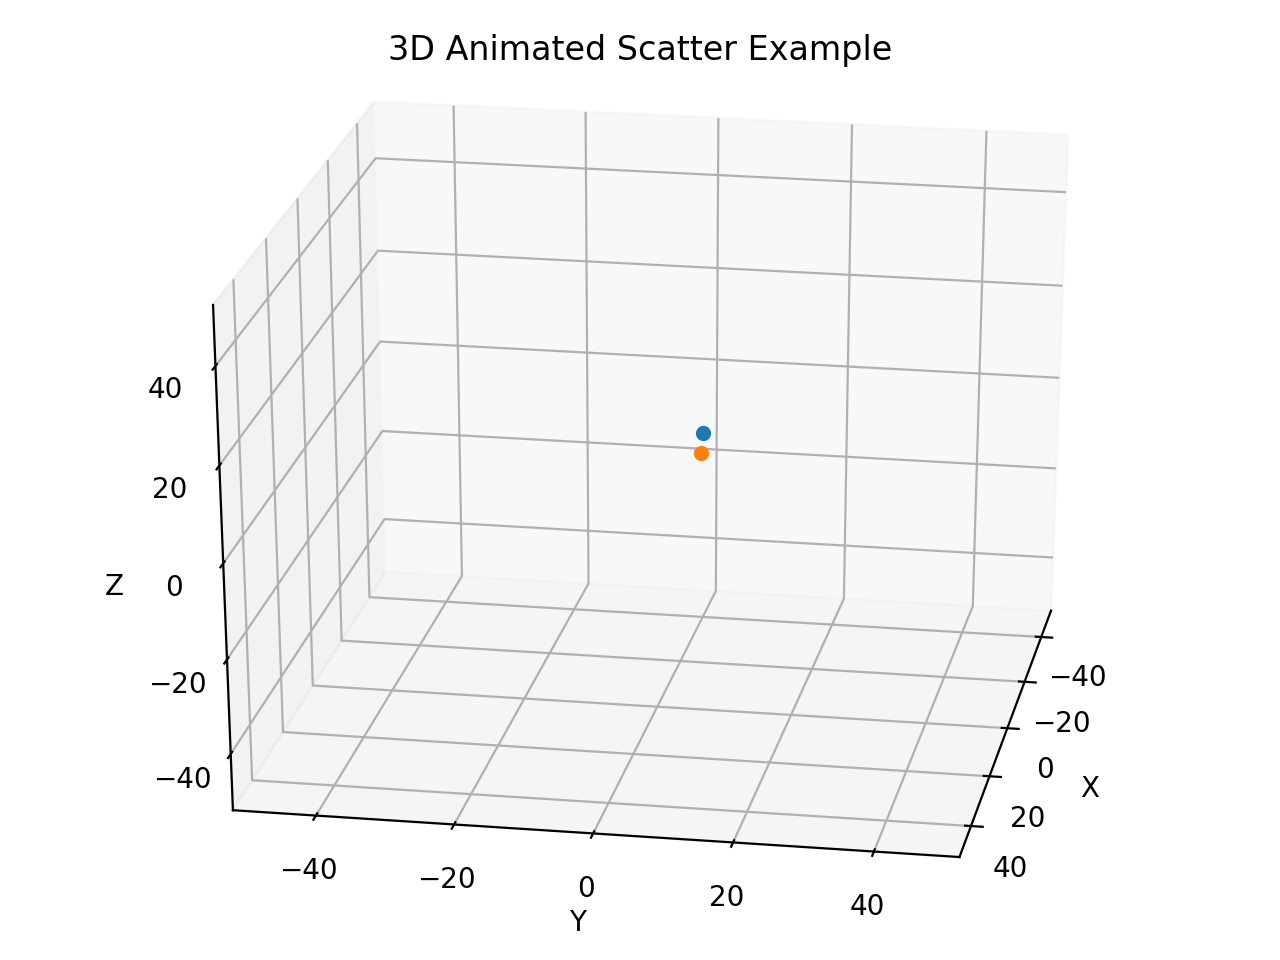

In [6]:
data = generate_data(100, 2)

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Initialize scatters
scatters = [ ax.scatter(data[0][i,0:1], data[0][i,1:2], data[0][i,2:]) for i in range(data[0].shape[0]) ]

# Number of iterations
iterations = len(data)

# Setting the axes properties
ax.set_xlim3d([-50, 50])
ax.set_xlabel('X')

ax.set_ylim3d([-50, 50])
ax.set_ylabel('Y')

ax.set_zlim3d([-50, 50])
ax.set_zlabel('Z')

ax.set_title('3D Animated Scatter Example')

# Provide starting angle for the view.
ax.view_init(25, 10)

ani = animation.FuncAnimation(fig, animate_scatters, iterations, fargs=(data, scatters),
                                   interval=50, blit=False, repeat=True)

plt.show()


In [4]:
def animate_game_of_life(iteration, cube, scatter):

    cube = np.random.randint(0, 20, (20, 20, 20)) == 0
    scatter.set_array(cube.flatten())        
    return scatter

<IPython.core.display.Javascript object>


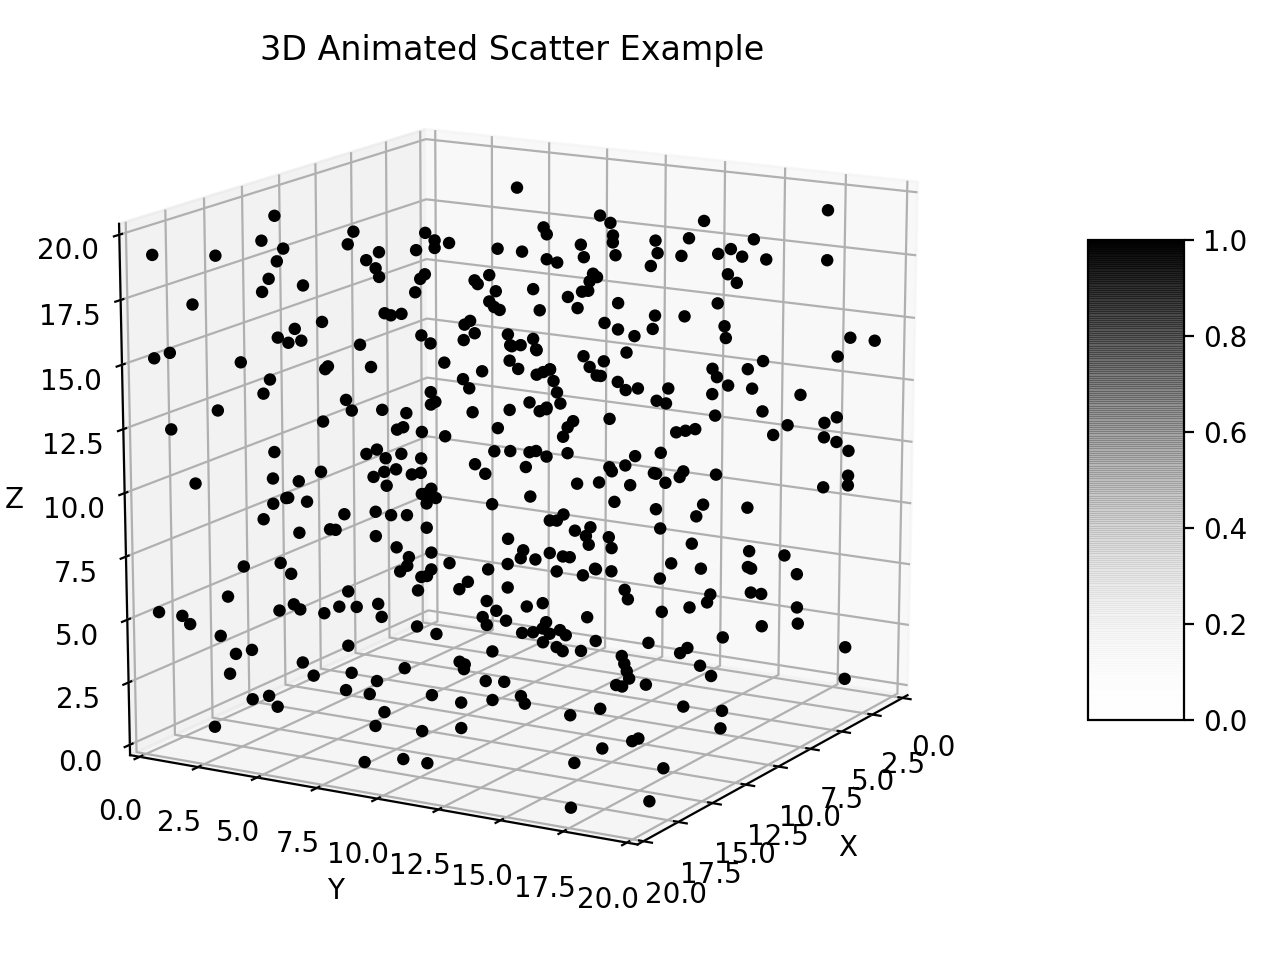

In [14]:
X, Y, Z = np.mgrid[0:20, 0:20, 0:20]

cube = np.random.randint(0, 20, (20, 20, 20)) == -1
# cube = np.full([20, 20, 20], np.nan)

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Initialize scatters
scatter = ax.scatter(X, Y, Z, c=cube.flatten(), cmap=my_cmap, vmin=0, vmax=1)

# Number of iterations
iterations = 1000

# Setting the axes properties
ax.set_xlim3d([0, 20])
ax.set_xlabel('X')

ax.set_ylim3d([0, 20])
ax.set_ylabel('Y')

ax.set_zlim3d([0, 20])
ax.set_zlabel('Z')

ax.set_title('3D Animated Scatter Example')

# Provide starting angle for the view.
ax.view_init(15, 30)

ani = animation.FuncAnimation(fig, animate_game_of_life, iterations, fargs=(cube, scatter),
                                   interval=100, blit=False, repeat=True)

fig.colorbar(scatter, shrink=0.5, aspect=5)

plt.show()
